Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other.

The correlation tells us how stock prices move in relation to each other. That is, given a stock A and a stock B, how are the prices related to each other.

A perfect negative correlation means that two stocks move in opposite directions

It is important to notice that a positive correlation does not promise that when stock A goes up, so does stock B. It is simply expected to happen on average.

In [1]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\HP\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
tickers = ['TCS.NS','INFY.NS']
start = dt.datetime(2010,1,1)
data = pdr.get_data_yahoo(tickers,start)

In [5]:
data.head()

Attributes   Adj Close                   Close                    High  \
Symbols         TCS.NS     INFY.NS      TCS.NS     INFY.NS      TCS.NS   
Date                                                                     
2010-01-04  299.222321  252.160812  375.825012  326.575012  379.450012   
2010-01-05  299.302032  253.005310  375.924988  327.668762  379.774994   
2010-01-06  292.534515  249.313553  367.424988  322.887512  376.100006   
2010-01-07  284.393555  243.710724  357.200012  315.631256  369.700012   
2010-01-08  278.581512  237.837692  349.899994  308.024994  359.250000   

Attributes                     Low                    Open              \
Symbols        INFY.NS      TCS.NS     INFY.NS      TCS.NS     INFY.NS   
Date                                                                     
2010-01-04  328.750000  374.524994  324.412506  377.399994  326.250000   
2010-01-05  328.837494  373.274994  325.012512  377.500000  327.500000   
2010-01-06  335.375000  366.500000  321.887512  375.924988  335.375000   
2010-01-07  323.325012  355.500000  314.774994  367.750000  323.325012   
2010-01-08  315.412506  348.250000  307.250000  358.000000  314.875000   

Attributes     Volume              
Symbols        TCS.NS     INFY.NS  
Date                               
2010-01-04  1963682.0   4069264.0  
2010-01-05  2014488.0   6895528.0  
2010-01-06  3349176.0   6817288.0  
2010-01-07  6474892.0  10892600.0  
2010-01-08  6048178.0  12649312.0

In [6]:
data.tail()

Attributes    Adj Close                     Close                      High  \
Symbols          TCS.NS      INFY.NS       TCS.NS      INFY.NS       TCS.NS   
Date                                                                          
2022-03-10  3620.949951  1825.900024  3620.949951  1825.900024  3684.000000   
2022-03-11  3599.149902  1822.000000  3599.149902  1822.000000  3639.850098   
2022-03-14  3643.000000  1890.699951  3643.000000  1890.699951  3648.350098   
2022-03-15  3593.899902  1839.300049  3593.899902  1839.300049  3659.000000   
2022-03-16  3655.899902  1889.400024  3655.899902  1889.400024  3668.000000   

Attributes                       Low                  Open               \
Symbols         INFY.NS       TCS.NS      INFY.NS   TCS.NS      INFY.NS   
Date                                                                      
2022-03-10  1844.750000  3615.000000  1810.199951  3684.00  1844.750000   
2022-03-11  1831.400024  3592.850098  1811.000000  3603.25  1814.000000   
2022-03-14  1895.000000  3580.000000  1831.550049  3580.00  1831.550049   
2022-03-15  1888.349976  3585.399902  1830.000000  3659.00  1888.349976   
2022-03-16  1893.949951  3616.250000  1849.000000  3640.50  1865.000000   

Attributes     Volume              
Symbols        TCS.NS     INFY.NS  
Date                               
2022-03-10  2005441.0   6547182.0  
2022-03-11  1623423.0   4758657.0  
2022-03-14  1765564.0  10289704.0  
2022-03-15  3651133.0   7140443.0  
2022-03-16  3089521.0   5232709.0

In [8]:
data = data['Adj Close']


In [9]:
log_returns = np.log(data/data.shift())

In [10]:
log_returns.corr()

Symbols,TCS.NS,INFY.NS
Symbols,,
TCS.NS,1.000000,0.525748
INFY.NS,0.525748,1.000000


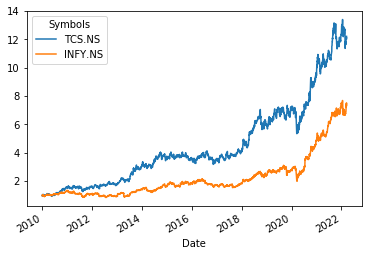

In [14]:
fig,ax = plt.subplots()
(data/data.iloc[0]).plot(ax=ax)

Project – Calculate the return (CAGR), maximal drawdown and volatility of TCS and INFOSYS

In [15]:
cagr_tcs = (data['TCS.NS'].iloc[-1]/data['TCS.NS'].iloc[0])**(1/10) - 1
cagr_infy = (data['INFY.NS'].iloc[-1]/data['INFY.NS'].iloc[0])**(1/10) - 1

In [17]:
cagr_tcs,cagr_infy

(0.28439921352994113, 0.2231075082430507)

This shows that the annual return of TCS is 28% and 22% for INFY.

In [22]:
def max_drawdown(data):
    rolling_max = data.cummax()
    daily_drawdown = data/rolling_max - 1
    max_drawdown = daily_drawdown.cummin().iloc[-1]
    return max_drawdown

In [23]:
max_drawdown(data['TCS.NS']),max_drawdown(data['INFY.NS'])

(-0.27211310278826784, -0.3795202057017226)

This shows that the maximum drawdown is 27.2% for TCS and 37.9% for INFY.

In [24]:
log_returns.std()*(252**0.5)

Symbols
TCS.NS     0.256332
INFY.NS    0.278949
dtype: float64

This shows that the volatility of TCS is 25% and 27% for INFY.


We can infer that both the scrips are positively correlated.